<a href="https://colab.research.google.com/github/zahratajik/ISMP/blob/main/Rankdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clear all

In [233]:
globals().clear()

Import Library

In [246]:
from astropy.utils.data import get_pkg_data_filename
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy.io import savemat
from astropy.io import fits
import numpy as np
import scipy.io
import warnings

**pad_array Function** : Add a zero row and column to the beginning and end of the matrix.

In [235]:
def pad_array(arr, all):
   if all == 1:
      arr1 = np.zeros((arr.shape[0]+1, arr.shape[1]))  #adds a row to top
      arr1[1:, :] = arr
      arr = arr1
   if all == 1:
      arr1 = np.zeros((arr.shape[0]+1, arr.shape[1])) #adds a row to bottom
      arr1[:-1, :] = arr
      arr = arr1
   if all == 1:
      arr1 = np.zeros((arr.shape[0], arr.shape[1]+1)) #adds col before
      arr1[:, 1:] = arr
      arr = arr1
   if all == 1:
      arr1 = np.zeros((arr.shape[0], arr.shape[1]+1)) # adds col after
      arr1[:, :-1] = arr
      arr = arr1
   return(arr)

**Rank-down Function**

In [238]:
def rankdown(Image, threshold):
  img = pad_array (Image,1)
  if threshold < 1:
    threshold = 0.1 * max(abs(img.ravel()))
  nx = img.shape[1]
  ny = img.shape[0]
  fnx = np.fix (img.shape[1])
  mask = np.zeros((img.shape[0], img.shape[1]))
  offsets = [0, 1, ny+1, ny, ny-1, -1, -ny-1, -ny, -ny+1]
  nloop = 1
  for q2 in range(0, nloop):
    tempimg= np.zeros((img.shape[0], img.shape[1]))
    if q2 == 0:
        tempimg = img.copy ()
    else:
        tempimg = img * (-1)
    sor, num = np.sort(tempimg.flatten()), np.argsort(tempimg.flatten())
    ranks = np.flip(num)
    zer_find = np.where(tempimg < threshold)
    n_zer_find = len (zer_find[0])
    n_check = int(fnx * ny - n_zer_find)
    tempmask = np.zeros((ny, nx))
    ranks= ranks.astype(int)
    tempmask.ravel()[ranks] = np.where(img.ravel() == img.ravel())
    if n_zer_find != 0:
      tempmask[zer_find[0],zer_find[1]] = n_check
    current_label = 1
    for q1 in range(1, n_check):
      q1=1
      maxnbr, maxpix = np.max(tempimg.ravel()[ranks[q1] + offsets]), np.argmax(tempimg.ravel()[ranks[q1] + offsets])
      nbrlabels = tempmask.ravel()[ranks[q1] + offsets]
      if len(str(maxpix)) != 0:
        tempmask.ravel()[ranks[q1]] = nbrlabels[maxpix]
      else:
        tempmask.ravel()[ranks[q1]] = current_label
        current_label += 1
      if q2 == 1:
        tempmask = tempmask + np.max(mask)
      tempmask[zer_find] = 0
      if q2 == 1:
          tempmask = -tempmask
      mask = mask + tempmask
  img = img[1:-1, 1:-1]
  mask = mask[1:-1, 1:-1]
  mask = np.fix(mask)
  return mask, img

**Main**

In [243]:
threshold=18
Image=scipy.io.loadmat('/content/edge_1.mat')['edge_1']
mask1, image=rankdown(Image, threshold)
mask2, image=rankdown(-Image, threshold)
savemat('mask1.mat', {'mask1': mask1})
savemat('mask2.mat', {'mask2': mask2})

**Plot**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


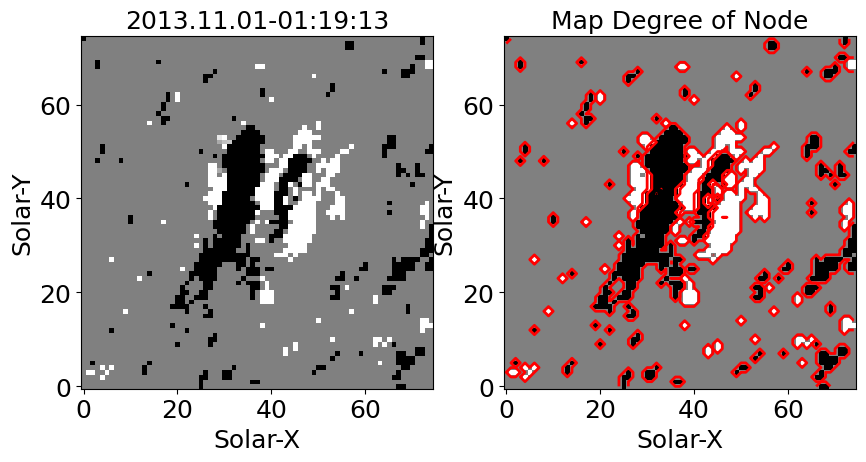

In [252]:

edge_=scipy.io.loadmat('edge_1.mat')['edge_1']
# mask=scipy.io.loadmat('mask.mat')['mask']
    # mask1=scipy.io.loadmat('mask1.mat')['mask1']

fig, axs = plt.subplots(1, 2, figsize=(10,7))
plt.gca().set_aspect('equal', adjustable='box')
im_cmap = plt.get_cmap('gray')
im_im = axs[0].imshow(Image, cmap=im_cmap, vmin=-60, vmax=60)
axs[0].set_xlabel('Solar-X', fontsize=18, fontname='Times New Roman')
axs[0].set_ylabel('Solar-Y', fontsize=18, fontname='Times New Roman')
axs[0].set_title('2013.11.01-01:19:13', fontsize=18, fontname='Times New Roman')
axs[0].axis('on')
axs[0].invert_yaxis()
axs[0].tick_params(axis='both', which='major', labelsize=18)


edge_cmap = ListedColormap(['black', 'gray', 'white'])
edge_ = edge_ * 60
    # edge_= edge_.reshape((-105, 90))
edge_im = axs[1].imshow(edge_, cmap=edge_cmap, vmin=-60, vmax=60)
axs[1].set_xlabel('Solar-X', fontsize=18, fontname='Times New Roman')
axs[1].set_ylabel('Solar-Y', fontsize=18, fontname='Times New Roman')
axs[1].set_title('Map Degree of Node', fontsize=18, fontname='Times New Roman')
axs[1].axis('on')
axs[1].invert_yaxis()
axs[1].tick_params(axis='both', which='major', labelsize=18)
plt.contour(mask1, levels=[1], linewidths=2, colors='r')
plt.contour(mask2, levels=[1], linewidths=2, colors='r')
plt.show()